# Streaming Data Template

### -----

### This workbook creates a graph that displays the number of web page accesses from several countries, separated by the operating systems they use.


In [26]:
import requests;                                 # import package used to downlaod data from a web URL
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import matplotlib;
matplotlib.style.use('ggplot');
%matplotlib inline

In [27]:
with open('API Key.txt', 'r') as keyfile:
    apikey=keyfile.read().replace('\n', '')

url = 'http://backpack.tf/api/IGetPrices/v4/?key=' + apikey;        # web address of data stream
data_stream = requests.get(url);                                    # create an iterable data stream object

In [ ]:
data_stream.iter_lines().next().strip() # Necessary before beginning to read data
# load multiple records at once (There probably is a better way to do this.)
num_records  = 1000
records = []
for k in range(num_records):
    rec = data_stream.iter_lines().next().strip()
    records.append(rec)
records = ','.join(records)
records = '['+records+']'

In [408]:
df = pd.read_json(records)
df = df.drop_duplicates('_id') # IMPORTANT: Remove duplicate people
df = df.drop(['_id', 'al', 'cy', 'g', 'gr', 'h', 'hc', 'hh', 'i', 'k', 'l', 'll', 'mc', 'nk', 't', 'tz', 'u'], axis=1)

In [409]:
def findOS(row):
    agent = row['a']
    if agent.find('Macintosh') >= 0:
        val = 'Mac'
    elif agent.find('iPhone') >= 0:
        val = 'iPhone'
    elif agent.find('Android') >= 0:
        val = 'Android'
    elif agent.find('Windows NT') >= 0:
        val = 'Windows PC'
    else:
        val = 'Other'
    return val

In [410]:
df['OS'] = df.apply(findOS, axis=1)

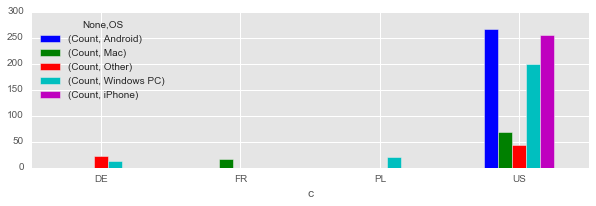

In [413]:
newdf = df;
newdf = newdf.groupby(['OS', 'c']).size().reset_index();
newdf.columns.values[2] = "Count";

# Remove rows with only 1 or 2 entries to avoid clutter
newdf = newdf.drop(newdf[newdf['Count'] < 3].index);

newdf = newdf.set_index(['OS', 'c']);
newdf = newdf.unstack('OS');

newdf = newdf.drop(['CA', 'VN', 'CN', 'SV']);

plot = newdf.plot.bar(figsize=(10, 2.8));
plt.setp(plot.xaxis.get_majorticklabels(), rotation=0);

### After running this workbook a few times and looking at the graph each time, it is evident that the US is the most common accessor of gov't websites, shortly followed by Germany, Poland, and France. It is clear that mobile devices are the most popular devices to use in the US, followed by Windows PCs. In France, interestingly, Macs are more common each time I run this.